In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import csv
import imageio
import os

In [2]:
# Function to generate quadratic data
def generate_quadratic_data(num_points, a, b, c, noise_level):
    """
    Generates a quadratic dataset with noise.

    Parameters:
        - num_points: Number of data points to generate.
        - a: Quadratic coefficient.
        - b: Linear coefficient.
        - c: Constant term.
        - noise_level: Level of random noise to add to the data.

    Returns:
        - x_vals: Array of x values.
        - y_vals: Array of corresponding y values.
    """
    x_vals = np.linspace(0, 10, num_points)
    noise = noise_level * np.random.normal(size=num_points)
    y_vals = a * x_vals**2 + b * x_vals + c + noise
    return x_vals, y_vals

# Generating quadratic data
num_points = 50
a = 1.0
b = 2.5
c = 1.0
noise_level = 1.0
x, y = generate_quadratic_data(num_points, a, b, c, noise_level)

with open('quadratic_dataset.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x', 'y'])
    for i in range(num_points):
        writer.writerow([x[i], y[i]])

print("Quadratic dataset saved as 'quadratic_dataset.csv'")

Quadratic dataset saved as 'quadratic_dataset.csv'


In [3]:
# Loading the dataset
x_vals = []
y_vals = []
with open('quadratic_dataset.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        x_vals.append(float(row[0]))
        y_vals.append(float(row[1]))

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# Normalization
x_vals = (x_vals - np.mean(x_vals)) / np.std(x_vals)
y_vals = (y_vals - np.mean(y_vals)) / np.std(y_vals)

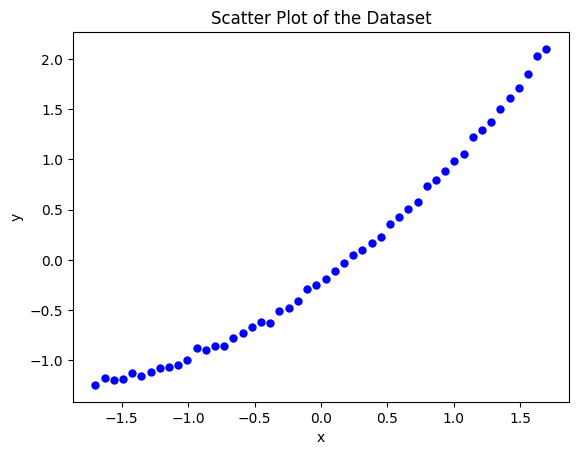

In [4]:
# Plot the data
plt.figure()
plt.plot(x_vals, y_vals, 'bo', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of the Dataset')
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def neural_network(params, x):
    W1, b1, W2, b2, W3, b3 = params
    hidden1 = sigmoid(np.dot(x, W1) + b1)
    hidden2 = sigmoid(np.dot(hidden1, W2) + b2)
    output = np.dot(hidden2, W3) + b3
    return output

def loss_function(params, x, y):
    y_predicted = neural_network(params, x)
    return np.mean((y - y_predicted)**2)

input_size = 1
hidden_layer1_size = 10
hidden_layer2_size = 10
output_size = 1

np.random.seed(0)
W1 = np.random.randn(input_size, hidden_layer1_size)
b1 = np.zeros(hidden_layer1_size)
W2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
b2 = np.zeros(hidden_layer2_size)
W3 = np.random.randn(hidden_layer2_size, output_size)
b3 = np.zeros(output_size)

params = [W1, b1, W2, b2, W3, b3]

# Gradient of the loss function
grad_loss = grad(loss_function)

# Learning rate
learning_rate = 0.01

# Iterations
iterations = 1000

plot_folder = "./plots"
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

for i in range(iterations):
    gradients = grad_loss(params, x_vals[:, np.newaxis], y_vals[:, np.newaxis])
    for j in range(len(params)):
        params[j] -= learning_rate * gradients[j]

    if i == 0 or (i + 1) % 10 == 0:
        plt.plot(x_vals, y_vals, 'o', label='Data Points')
        plt.plot(x_vals, neural_network(params, x_vals[:, np.newaxis]), label=f'Iteration {i+1}')
        current_loss = loss_function(params, x_vals[:, np.newaxis], y_vals[:, np.newaxis])
        plt.legend([f'Data Points', f'Loss: {current_loss:.2f}'], handlelength=0)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Simple Neural Network - Iteration {i+1}')
        filename = f"{plot_folder}/plot_{i+1}.png"
        plt.savefig(filename)
        plt.clf()

<Figure size 640x480 with 0 Axes>

In [6]:
print("Final parameters:", params)

def sort_images(filepaths):
    return sorted(filepaths, key=lambda x: int(os.path.splitext(x)[0].split('_')[-1]))

image_paths = [os.path.join(plot_folder, f) for f in os.listdir(plot_folder) if f.endswith('.png')]
sorted_paths = sort_images(image_paths)
images = [imageio.imread(path) for path in sorted_paths]
duration = 0.1
imageio.mimsave('./output.gif', images, fps=1/duration)

print("GIF created successfully!")

Final parameters: [array([[ 1.81813203, -0.30133294,  0.96903744,  2.21959066,  1.82317552,
        -1.32282152,  0.65580183, -0.46852822, -0.01854344,  1.08019306]]), array([-0.09433609,  0.05670497, -0.07077791, -0.02838109,  0.03775468,
        0.18304047,  0.11992067, -0.05012016,  0.00596865, -0.24917099]), array([[ 0.30732786,  1.51125616,  0.71027945,  0.33588993,  0.33514523,
         0.35381555,  1.59310043, -0.24365099,  0.35299233, -0.80235777],
       [-2.56649421,  0.62119288,  0.96920474, -0.71363907,  2.25831264,
        -1.49349347,  0.00350574, -0.16915155,  1.50694018,  1.46053775],
       [ 0.26879896,  0.40647995, -0.8894214 , -1.81519583, -0.43027815,
         0.1571384 ,  1.28639752,  1.18149462, -0.36862749, -0.27010465],
       [-0.87657428, -1.35673045, -1.76645135,  2.17155639, -0.62228364,
        -0.41388881, -1.14586582,  0.73538679, -1.56923829, -0.15658652],
       [-0.73329778,  0.44367861, -0.55987786, -0.96832083, -0.13592978,
         0.44810607,  0.1

<ipython-input-6-812ab77fcb3c>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(path) for path in sorted_paths]


GIF created successfully!


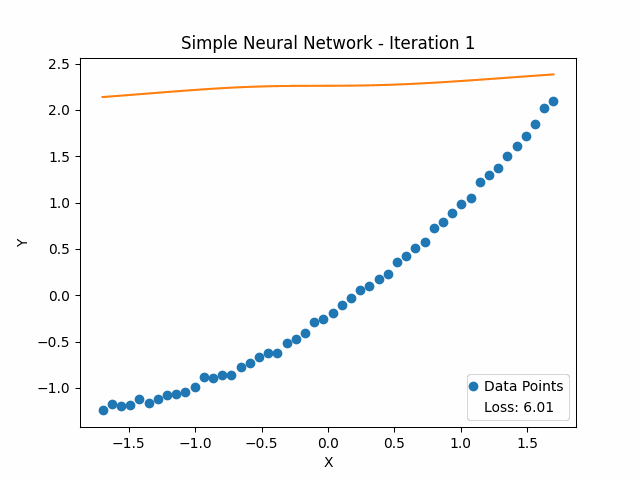

In [7]:
from IPython.display import Image
Image(filename='/content/output.gif')